## Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a <b>discrete target variable</b>.

Mutual information (MI) between two random variables is a <b>non-negative value</b>, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

<b>Inshort</b>

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.</b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [2]:
# df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
# df.to_csv("wine.csv")

In [3]:
# Here Wine is our target variable
df = pd.read_csv("File/Wine.csv")
df.head()

,Id,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Check the Shape
df.shape

(178, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    178 non-null    int64  
 1   Wine                  178 non-null    int64  
 2   Alcohol               178 non-null    float64
 3   Malic.acid            178 non-null    float64
 4   Ash                   178 non-null    float64
 5   Acl                   178 non-null    float64
 6   Mg                    178 non-null    int64  
 7   Phenols               178 non-null    float64
 8   Flavanoids            178 non-null    float64
 9   Nonflavanoid.phenols  178 non-null    float64
 10  Proanth               178 non-null    float64
 11  Color.int             178 non-null    float64
 12  Hue                   178 non-null    float64
 13  OD                    178 non-null    float64
 14  Proline               178 non-null    int64  
dtypes: float64(11), int64(4

In [6]:
df.drop(labels=['Id'],axis=1,inplace=True)

In [7]:
# Split the Features and label
features = df.drop(labels=['Wine'],axis=1)
label = df["Wine"]

In [8]:
features

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
label

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [10]:
### Train test split to avoid overfitting

x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.3,random_state=1)

In [11]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.4,1.08,2.27,480
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.5,1.25,3.40,915
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.8,0.75,3.64,380
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.1,0.73,1.58,695


In [12]:
# determine the mutual information

mutual_info = mutual_info_classif(X= x_train, y= y_train)

In [13]:
mutual_info

array([0.37341832, 0.29917102, 0.11016599, 0.20279051, 0.1427339 ,
       0.44084738, 0.68507455, 0.10370159, 0.19033173, 0.54721839,
       0.47959812, 0.47137102, 0.59633742])

In [14]:
mutual_info2 = pd.Series(mutual_info)
mutual_info2

0     0.373418
1     0.299171
2     0.110166
3     0.202791
4     0.142734
5     0.440847
6     0.685075
7     0.103702
8     0.190332
9     0.547218
10    0.479598
11    0.471371
12    0.596337
dtype: float64

In [15]:
mutual_info2.index = x_train.columns
mutual_info2.sort_index(ascending=False)

Proline                 0.596337
Proanth                 0.190332
Phenols                 0.440847
OD                      0.471371
Nonflavanoid.phenols    0.103702
Mg                      0.142734
Malic.acid              0.299171
Hue                     0.479598
Flavanoids              0.685075
Color.int               0.547218
Ash                     0.110166
Alcohol                 0.373418
Acl                     0.202791
dtype: float64

In [16]:
# We can do it directly
a = pd.Series(data= mutual_info, index= x_train.columns)
a.sort_index(ascending=False)

Proline                 0.596337
Proanth                 0.190332
Phenols                 0.440847
OD                      0.471371
Nonflavanoid.phenols    0.103702
Mg                      0.142734
Malic.acid              0.299171
Hue                     0.479598
Flavanoids              0.685075
Color.int               0.547218
Ash                     0.110166
Alcohol                 0.373418
Acl                     0.202791
dtype: float64

<AxesSubplot:>

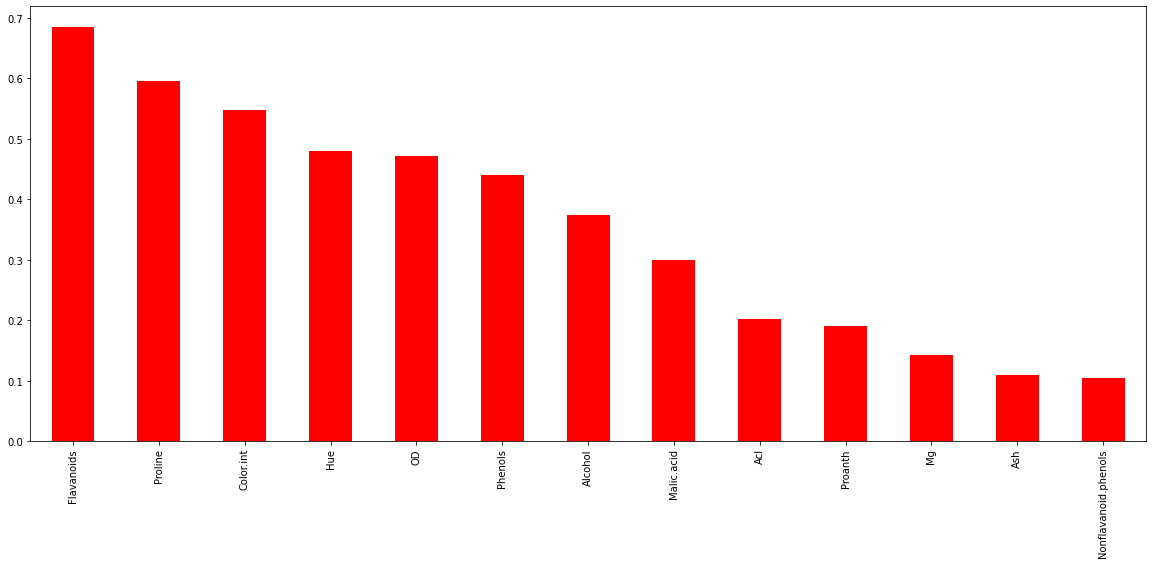

In [17]:
#let's plot the ordered mutual_info values per feature
mutual_info2.sort_values(ascending=False).plot.bar(figsize=(20,8),color='red')

In [18]:
#No we Will select the  top 5 important features

select_five_cols = SelectKBest(score_func= mutual_info_classif, k= 5)
select_five_cols.fit(x_train, y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000017207DFE550>)

In [19]:
select_five_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [20]:
x_train.columns[select_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [21]:
others_cols = [column for column in x_train.columns if column not in x_train.columns[select_five_cols.get_support()]]
others_cols

['Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Nonflavanoid.phenols',
 'Proanth']

<b>Difference Between Information Gain And Mutual Information.</b><br>
<b>I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)</b>

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.